In [5]:
#Importing the required libraries for executing linear regression algorithm 
#to know and show the best fit line.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Now after importing the required libraries, you need to download and import this ".csv"
#that is in the data set of "salary dataset" question only
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
#Shaping the dataset to know how many rows and coloums are there
df.shape

(30, 3)

In [7]:
#This will gives us the data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [8]:
#Gives summary of the dataset
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [9]:
#this will check if there are any missing values in the dataset
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

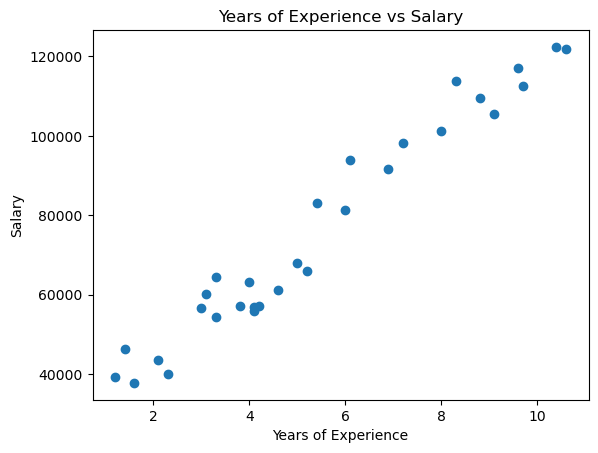

In [10]:
#We use this to plot the points on a graph
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()

In [11]:
#Defining independent variable and dependent variable
X = df[["YearsExperience"]]   # Independent variable
y = df["Salary"]              # Dependent variable

In [13]:
#After defining the dataset, now we have to split the data into two parts:
#1-Training data, 2-Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (21, 1)
Testing data size: (9, 1)


In [14]:
#Now we have to create and Train the model with linear regression algorithm
#And also fitting include in this method
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
#These are the model parameters means inplimentation of equation of line
intercept = model.intercept_
slope = model.coef_[0]

print("Intercept (b0):", intercept)
print("Slope (b1):", slope)

Intercept (b0): 24985.53016251169
Slope (b1): 9339.081723815198


In [16]:
#Making prediction on testing data
y_pred = model.predict(X_test)

In [17]:
#Now we have to compare with actual model vs predicted model 
#To know if there are any changes in the dataset
comparison = pd.DataFrame({
    "YearsExperience": X_test["YearsExperience"],
    "Actual Salary": y_test,
    "Predicted Salary": y_pred
})

comparison

,YearsExperience,Actual Salary,Predicted Salary
27,9.7,112636.0,115574.622884
15,5.0,67939.0,71680.938782
23,8.3,113813.0,102499.908470
17,5.4,83089.0,75416.571471
8,3.3,64446.0,55804.499851
9,3.8,57190.0,60474.040713
28,10.4,122392.0,122111.980090
24,8.8,109432.0,107169.449332
12,4.1,56958.0,63275.765230


In [18]:
#Inplimentation of mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 37784662.46621308


In [19]:
# Calculating R^2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9414466227178215


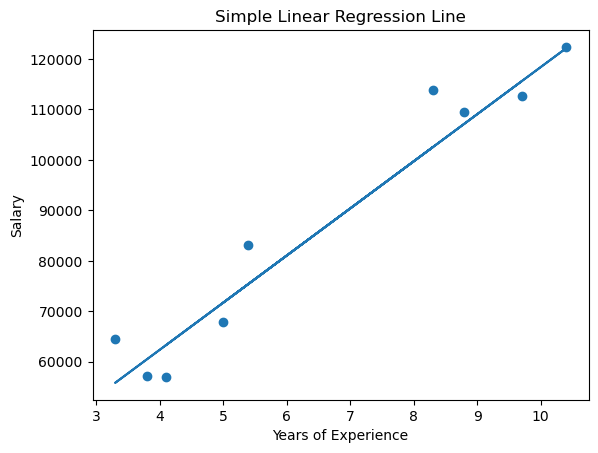

In [20]:
#Now we will find the best fit line by plotting the regression line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression Line")
plt.show()